In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [38]:
#XOR input
x=np.array([[0,0,1,1],[0,1,0,1]])
#XOR outputs
y=np.array([[0,1,1,0]])

#number of input neurons
input_neurons = 2

#number of hidden neurons
hidden_neurons = 2

#number of output neurons
output_neurons = 1

m= x.shape[0]
#learning rate
learning_rate = 0.1

epochs = 10000

#define random seed for consistent results
np.random.seed(42)

#weight matrices for neural network
weights_input_hidden = np.random.rand(hidden_neurons, input_neurons)
weights_hidden_output = np.random.rand(output_neurons, hidden_neurons)

#losses
losses = []


In [39]:
#forward propagation
def forward_prop( weights_input_hidden, weights_hidden_output,x):
    hidden_layer_input = np.dot( weights_input_hidden, x)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(weights_hidden_output, hidden_layer_output)
    predicted_output = sigmoid(output_layer_input)

    return hidden_layer_input, hidden_layer_output, output_layer_input, predicted_output
    

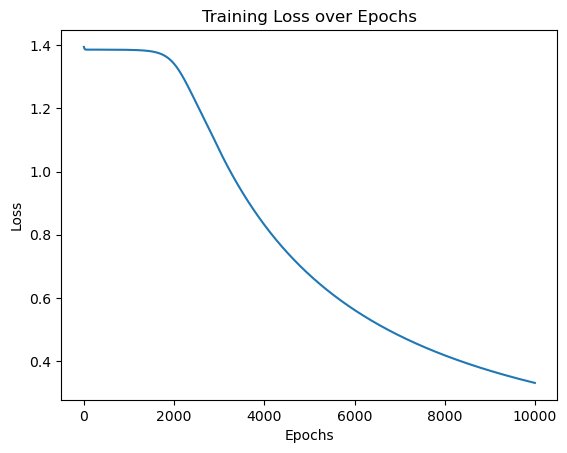

In [40]:
epochs = 10000
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot( weights_input_hidden, x)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot( weights_hidden_output, hidden_layer_output)
    predicted_output = sigmoid(output_layer_input)

    # Compute loss
    loss = -(1/x.shape[0]) * np.sum(y * np.log(predicted_output) + (1 - y) * np.log(1 - predicted_output))
    losses.append(loss)

    # Backpropagation
    error = predicted_output - y
    d_weights_hidden_output = np.dot( error, hidden_layer_output.T) / m
    d_hidden_layer_output = np.dot( weights_hidden_output.T, error) * sigmoid_derivative(hidden_layer_output)
    d_weights_input_hidden = np.dot( d_hidden_layer_output, x.T) / m

    # Update weights
    weights_input_hidden -= learning_rate * d_weights_input_hidden
    weights_hidden_output -= learning_rate * d_weights_hidden_output

# Plot loss over epochs
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()



    

In [41]:
def predict(weights_input_hidden, weights_hidden_output, x):
    hidden_layer_input = np.dot( weights_input_hidden, test)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot( weights_hidden_output, hidden_layer_output)
    predicted_output = sigmoid(output_layer_input)

    if predicted_output > 0.5:
        return 1
    else:
        return 0
    

In [42]:
test = np.array([[0],[1]])
prediction = predict(weights_input_hidden, weights_hidden_output, test)
print(f'Test input: {test.flatten()}')
print(f'Prediction: {prediction}')


Test input: [0 1]
Prediction: 1
